# Árboles de decisión y bosques aleatorios

- Los árboles de decisión y los bosques aletorios pertenecen al grupo de algoritmos clásicos más robustos, junto con las máquinas de vectores de soporte.

- Su objetivo se centra en la generación de fronteras de decisión mediante umbralizaciones sobre os atributos.


In [1]:
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### 1. Entrenamiento y visualización

A continuación se ilustra el principio de funcionamiento mediante la umbralización de atributos.

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
iris.data.head(3)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values 
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#entrenamiento de un arbol de decisión
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [3]:
from sklearn.tree import export_graphviz

#gráfico del arbol
export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

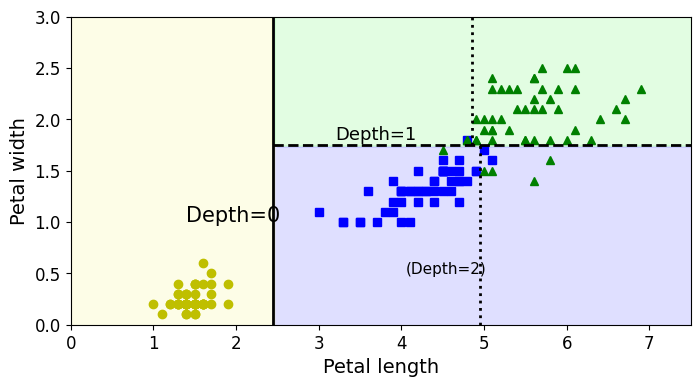

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

- Las umbralizaciones se pueden entender mediante el siguiente diagrama:

5
1.5

![UmbralesRF](https://github.com/amalvarezme/AnaliticaDatos/blob/master/3_Clasificacion/umbralesRF.png?raw=1)



- Los árboles de decisión basan su aprendizaje en la medida Gini impurity (Gini ideal $\to$ 0):

$$G_i = 1 - \sum^n_{k=1}p^2_{i,k}$$

- Por ejemplo, para el **Depth-2 (node 1)** del diagrama mostrado:

$$G_i = 1-(0/54)^2-(49/54)^2-(5/54)^2 = 0.168 $$

- Existen alternativas para el Gini, como la entropía.

**La Optimización se realiza de forma heurística utiilzando el algoritmo [CART](https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/)**.

# Predecir etiqueta y probabilidad de clase

- Se debe resaltar que las probabilidades dependen del nodo de decisión, más no de la muestra en sí. Todas las muestras en un mismo nodo, tendrán la misma probabilidad de clase.

In [5]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [6]:
tree_clf.predict([[5, 1.5]])

array([1])

#### Problemas en el entrenamiento

- Sensible al sobre-ajuste.

- Requiere regularización en términos de la cantidad de muestras en un nodo, buscando generalizar mejor las fronteras o el max_depth

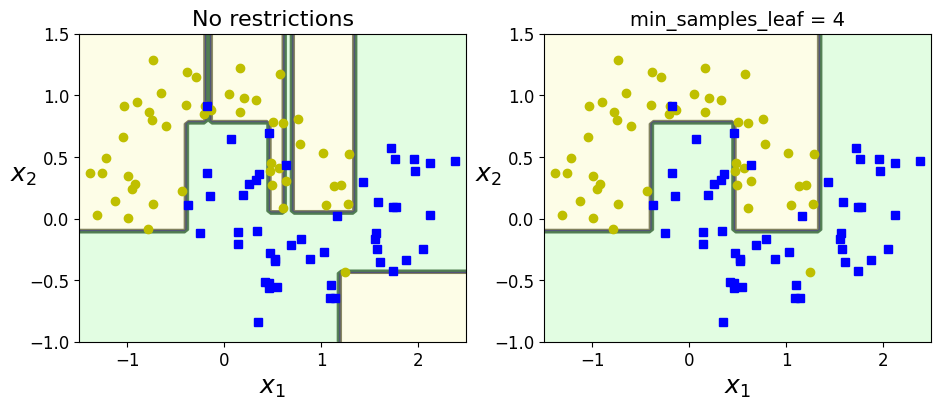

In [7]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)


plt.show()

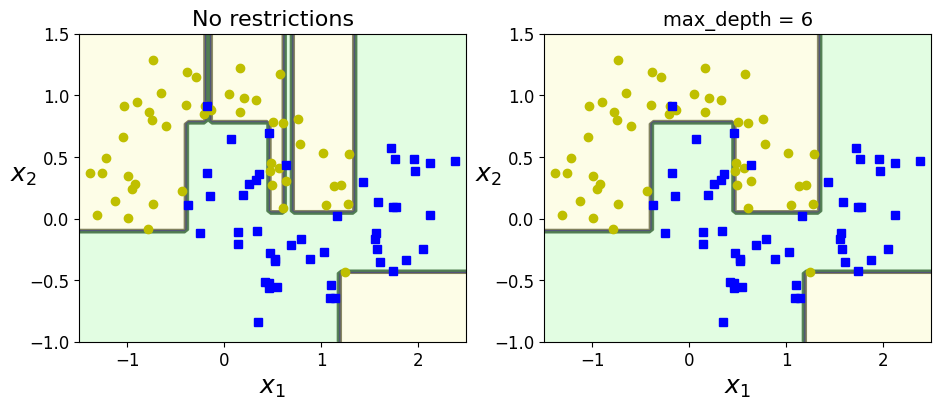

In [8]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(max_depth=6, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("max_depth = {}".format(deep_tree_clf2.max_depth), fontsize=14)


plt.show()

### 2. Parámetros libres (Hiperparámetros)

- criterion: Criterio para medir la pureza. En general, no se observan mayores cambios en los resultados de clasificación.

- max_depth, min_samples_leaf, max_features: parámetros que regularizan el comportamiento de las fronteras de decisión, esto evita el sobreajuste del modelo. Su valor depende de las características de cada base de datos.

### 3. Bosques Aleatorios

Un bosque aleatorio se puede entender como un método de ensamble, es decir, un modelo que se constuye a partir de la combinación de múltiples clasificadores.

Para el caso de random forest se usan $N$ árboles de decisión, donde a cada uno de ellos le corresponde una partición aleatoria de la base de datos. La decisión final se obtiene mediante voto mayoritario (moda).


![RandomForest](https://github.com/amalvarezme/AnaliticaDatos/blob/master/3_Clasificacion/randomforest.png?raw=1)

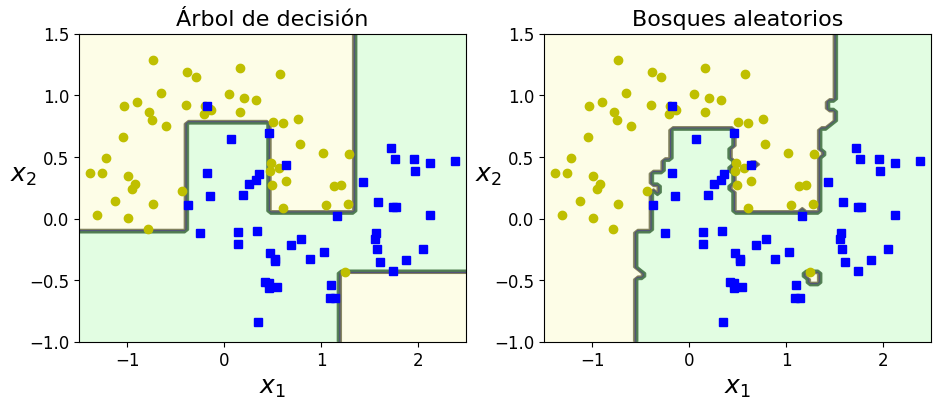

In [9]:
from sklearn.ensemble import RandomForestClassifier

N = 500 # número de árboles de decisión 

RF = RandomForestClassifier(n_estimators = N, random_state=42)
RF.fit(Xm, ym)


plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("Árbol de decisión", fontsize=16)
plt.subplot(122)
plot_decision_boundary(RF, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("Bosques aleatorios", fontsize=16)


plt.show()